In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'1.4.2'

In [3]:
df_Jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_Feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [4]:
!pip install pyarrow


In [5]:
df_Jan.shape

(3066766, 19)

In [17]:
df_Jan.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0,8
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.0,0.5,4.0,0.0,1.0,16.9,2.5,0.0,6
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.0,0.5,15.0,0.0,1.0,34.9,2.5,0.0,12


In [13]:
df_Jan['duration'] = ((df_Jan['tpep_dropoff_datetime'] - df_Jan['tpep_pickup_datetime']) / pd.Timedelta(minutes = 1)).astype(int)

In [14]:
# count standard deviation
def compute_std(x: pd.Series):
    mean_val = np.sum(x)/x.shape[0]
    std_val = np.sqrt(np.sum(np.square(x.subtract(mean_val)))/(x.shape[0]-1))
    return std_val

print(compute_std(df_Jan['duration']))

42.59449915808723


In [54]:
x = (df_Jan['duration'] <= 60) & (df_Jan['duration'] >= 1)
no_outlier_df = df_Jan[x]

In [55]:
x.value_counts()


True     3011044
False      55722
Name: duration, dtype: int64

In [56]:
no_outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3011044 entries, 0 to 3066765
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [61]:
no_outlier_df.shape[0] / df_Jan.shape[0]

0.9818303711466737

<AxesSubplot:>

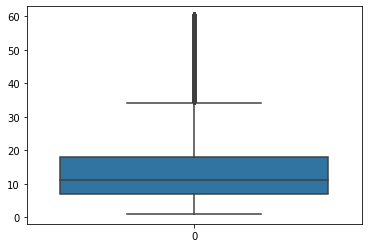

In [57]:
sns.boxplot(data=no_outlier_df['duration'])